In [1]:
from datetime import date
from nsepy import get_history
import numpy as np
import pandas as pd
import pickle
import yfinance as yf

In [4]:
df = pd.read_csv('ind_nifty50list.csv')
nifty_companies_symbols=df['Symbol'].values.tolist()
nifty_companies_symbols_yfin=df['Symbol'].values.tolist()
for count in range(len(nifty_companies_symbols)):
    nifty_companies_symbols_yfin[count] = nifty_companies_symbols[count] + ".NS"
start = date(2021, 1, 1)
end = date(2022, 12, 31)
divi={}
for i in nifty_companies_symbols_yfin:
    df=yf.download(i,start=start,end=end,actions=True).reset_index()
    df['Date']=df['Date'].apply(lambda x: x.date())
    df.set_index('Date',inplace=True)
    df=df[df['Dividends']>0]
    df=df[['Dividends']]
    df.rename(columns = {'Dividends':i}, inplace = True)
    dic=df.to_dict()
    divi.update(dic)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
start = date(2021, 1, 1)
end = date(2022, 12, 31)
all_data=pd.DataFrame(columns=['Symbol','Close','P/L %'])
for symbol in nifty_companies_symbols:
    data = get_history(symbol=symbol, start=start, end=end)
    data=data[['Symbol','Close']]
    data['P/L %']=data['Close'].pct_change(periods=250)*100
    all_data=pd.concat([all_data,data])
all_data

KeyboardInterrupt: 

In [4]:
all_data=all_data.dropna()
all_data.reset_index(names='Date',inplace=True)

In [5]:
all_data.sort_values(by=['Date','P/L %'],inplace=True,ascending=[True,False])

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_20160\374801556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.sort_values(by=['Date','P/L %'],inplace=True,ascending=[True,False])


In [10]:
all_data=all_data.reset_index(drop=True)

In [12]:
all_data.to_pickle("all_data"+".pkl")

In [5]:
all_data = pd.read_pickle("all_data.pkl")
all_data

,Date,Symbol,Close,P/L %
0,2022-01-05,ADANIENT,1715.45,249.272116
1,2022-01-05,TATAMOTORS,489.75,162.600536
2,2022-01-05,APOLLOHOSP,4973.25,105.944469
3,2022-01-05,BAJAJFINSV,17988.40,102.790163
4,2022-01-05,HINDALCO,475.35,99.433606
...,...,...,...,...
12295,2022-12-30,DIVISLAB,3413.20,-26.146789
12296,2022-12-30,TECHM,1016.40,-43.117777
12297,2022-12-30,WIPRO,392.75,-44.187864
12298,2022-12-30,TATASTEEL,112.65,-89.908175


In [7]:
from dateutil.relativedelta import relativedelta
backtest_start=date(2022, 1, 5)
backtest_end=date(2022, 12, 30)
temp=backtest_start
temp_list=[]
while temp<=backtest_end:
    if temp in all_data.Date.unique():
        temp_list.append(temp)
        temp =temp + relativedelta(months=+1)  
    else:
        temp=temp+relativedelta(days=+1)
    
print(temp_list)

[datetime.date(2022, 1, 5), datetime.date(2022, 2, 7), datetime.date(2022, 3, 7), datetime.date(2022, 4, 7), datetime.date(2022, 5, 9), datetime.date(2022, 6, 9), datetime.date(2022, 7, 11), datetime.date(2022, 8, 11), datetime.date(2022, 9, 12), datetime.date(2022, 10, 12), datetime.date(2022, 11, 14), datetime.date(2022, 12, 14)]


In [8]:
df5=all_data[all_data.Date.isin(temp_list)]
df5

,Date,Symbol,Close,P/L %
0,2022-01-05,ADANIENT,1715.45,249.272116
1,2022-01-05,TATAMOTORS,489.75,162.600536
2,2022-01-05,APOLLOHOSP,4973.25,105.944469
3,2022-01-05,BAJAJFINSV,17988.40,102.790163
4,2022-01-05,HINDALCO,475.35,99.433606
...,...,...,...,...
11695,2022-12-14,DIVISLAB,3393.85,-25.087189
11696,2022-12-14,TECHM,1065.10,-34.981534
11697,2022-12-14,WIPRO,400.05,-38.015184
11698,2022-12-14,TATASTEEL,113.05,-90.298636


In [29]:
for i in range(0, len(df5), 50):
    slc = df5.iloc[i : i + 50]
    slc=slc.reset_index(drop=True)
    slc.to_pickle("./"+str(slc.iloc[0]['Date'])+".pkl")

In [9]:
file_list=[]
date_list=[]
for i in range(0, len(df5), 50):
    slc = df5.iloc[i : i + 50]
    slc=slc.reset_index(drop=True)
    file_list.append(str(slc.iloc[0]['Date'])+".pkl")
    date_list.append(slc.iloc[0]['Date'])
print(file_list)

['2022-01-05.pkl', '2022-02-07.pkl', '2022-03-07.pkl', '2022-04-07.pkl', '2022-05-09.pkl', '2022-06-09.pkl', '2022-07-11.pkl', '2022-08-11.pkl', '2022-09-12.pkl', '2022-10-12.pkl', '2022-11-14.pkl', '2022-12-14.pkl']


In [51]:
def entry():
    for i in range(10):
        data=[]
        data.append((portfolio_value*0.1)/unpickled_df.iloc[i]['Close'])
        data.append(unpickled_df.iloc[i]['Close'])
        portfolio[unpickled_df.iloc[i]['Symbol']]=data
    equity_curve.append(portfolio_value)
def recalibrate():
    print("date"+str(unpickled_df.iloc[0]['Date']))
    top_30=set()
    for i in range(30):
        top_30.add(unpickled_df.iloc[i]['Symbol'])
    removed_stocks=[]
    for i in portfolio.keys():
        if i not in top_30:
            removed_stocks.append(i)
    returns_from_shorted_stocks=[]
    for i in removed_stocks:
        value=portfolio[i][0]*(float(unpickled_df[unpickled_df['Symbol']==i]['Close']))
        returns_from_shorted_stocks.append(value)
        stock_data=portfolio.pop(i)
        d={'Date':unpickled_df.iloc[0]['Date'], 'Entry Price':stock_data[1],'Exit Price':unpickled_df[unpickled_df['Symbol']==i]['Close'],'Shares':stock_data[0]}
        df1 = pd.DataFrame(relinquished_stocks_data)
        pd.concat([relinquished_stocks_data,df1])
        print("removed:"+i)
#         print(value)
    returns_from_shorted_stocks.sort(reverse=True)
    print(returns_from_shorted_stocks)
    for i in range(50):
        if unpickled_df.iloc[i]['Symbol'] not in portfolio.keys() and len(portfolio)<10:
            portfolio[unpickled_df.iloc[i]['Symbol']]=(returns_from_shorted_stocks.pop(0)/unpickled_df.iloc[i]['Close'])
            print("added"+unpickled_df.iloc[i]['Symbol'])
        if len(portfolio)>=10:
            break
    value=0
#     for i in portfolio.keys():
#         value+=portfolio[i][0]*(float(unpickled_df[unpickled_df['Symbol']==i]['Close']))
#     equity_curve.append(value)
def exit():
    value=0
    for i in portfolio.keys():
        value+=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])*portfolio[i][0]
    equity_curve.append(value)

In [47]:
def entry():
    for i in range(10):
        data=[]
        data.append((portfolio_value*0.1)/unpickled_df.iloc[i]['Close'])
        data.append(unpickled_df.iloc[i]['Close'])
        data.append(unpickled_df.iloc[0]['Date'])
        portfolio[unpickled_df.iloc[i]['Symbol']]=data
    equity_curve.append(portfolio_value)
def recalibrate(relinquished_stocks_data):
    date=unpickled_df.iloc[0]['Date']
    print("date"+str(date))
    top_30=set()
    for i in range(30):
        top_30.add(unpickled_df.iloc[i]['Symbol'])
    removed_stocks=[]
    for i in portfolio.keys():
        if i not in top_30:
            removed_stocks.append(i)
    returns_from_shorted_stocks=[]
    for i in removed_stocks:
        value=0
        exit_price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        value+=portfolio[i][0]*exit_price
        returns_from_shorted_stocks.append(value)
        stock_data=portfolio.pop(i)
#         s1=pd.Series([unpickled_df.iloc[0]['Date'],stock_data[1],unpickled_df[unpickled_df['Symbol']==i]['Close'],stock_data[0]])
        d={'Share':i,'Entry Date':stock_data[2],'Entry Price':stock_data[1],'Exit Date':date,'Exit Price':exit_price,'Shares':stock_data[0]}
        d["P/L"]=d['Exit Price']-d['Entry Price']
        d['P/L%']=(d['Exit Price']-d['Entry Price'])/d['Entry Price']*100
#         df1 = pd.DataFrame(s1)
#         print(df1)
        relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
        print("removed:"+i)
#         print(value)
    returns_from_shorted_stocks.sort(reverse=True)
#     print(returns_from_shorted_stocks)
    for i in range(50):
        if unpickled_df.iloc[i]['Symbol'] not in portfolio.keys() and len(portfolio)<10:
            portfolio[unpickled_df.iloc[i]['Symbol']]=[(returns_from_shorted_stocks.pop(0)/unpickled_df.iloc[i]['Close']),unpickled_df.iloc[i]['Close'],unpickled_df.iloc[0]['Date']]
#             print("added"+unpickled_df.iloc[i]['Symbol'])
        if len(portfolio)>=10:
            break
    total_value=0
    for i in portfolio.keys():
        price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        if date in divi[i+".NS"].keys():
            portfolio[i][0]+=((divi[i+".NS"][date]*portfolio[i][0])/price)
        total_value+=portfolio[i][0]*price
    equity_curve.append(total_value)
    return relinquished_stocks_data
def exit(relinquished_stocks_data):
    value=0
    for i in portfolio.keys():
        stock_data=portfolio.get(i)
        exit_price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        d={'Share':i,'Entry Date':stock_data[2],'Entry Price':stock_data[1],'Exit Date':unpickled_df.iloc[0]['Date'],'Exit Price':exit_price,'Shares':stock_data[0]}
        d["P/L"]=d['Exit Price']-d['Entry Price']
        d['P/L%']=(d['Exit Price']-d['Entry Price'])/d['Entry Price']*100
        value+=exit_price*stock_data[0]
        relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
    portfolio.clear()
    print(f"v:{value}")
    equity_curve.append(value)
    return relinquished_stocks_data
    

In [59]:
def find_portfolio_value(date):
    value=0
    for i in portfolio.keys():
        price=float(curr_date[(curr_date['Date'] == date) & (curr_date["Symbol"] == i)]['Close'])
        if date in divi[i+".NS"].keys():
            t=divi[i+".NS"][date]
            v=t*float(curr_date[(curr_date['Date'] == date) & (curr_date["Symbol"] == i)]['Close'])
            portfolio[i][0]+=((divi[i+".NS"][date]*portfolio[i][0])/price)
            print(divi[i+".NS"][date]*portfolio[i][0])
        value+=price*portfolio[i][0]
    equity_curve.append(value)

In [16]:
gk=all_data.groupby('Date')

In [45]:
all_trading_dates=list(gk.first().apply(lambda x:x).reset_index()['Date'])

In [46]:
all_trading_dates

[datetime.date(2022, 1, 5),
 datetime.date(2022, 1, 6),
 datetime.date(2022, 1, 7),
 datetime.date(2022, 1, 10),
 datetime.date(2022, 1, 11),
 datetime.date(2022, 1, 12),
 datetime.date(2022, 1, 13),
 datetime.date(2022, 1, 14),
 datetime.date(2022, 1, 17),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 1, 19),
 datetime.date(2022, 1, 20),
 datetime.date(2022, 1, 21),
 datetime.date(2022, 1, 24),
 datetime.date(2022, 1, 25),
 datetime.date(2022, 1, 27),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 2, 3),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 2, 22),
 datetime.date(2022, 2, 

In [60]:
# unpickled_df = pd.read_pickle("2022-04-05.pkl")
portfolio={}
equity_curve=[]
portfolio_value=100000
relinquished_stocks_data= pd.DataFrame()
count=0
for j in all_trading_dates:
    if j in date_list:
        file_name=str(j)+".pkl"
        unpickled_df = pd.read_pickle(file_name)
        if file_name==file_list[0]:
            entry()
        elif file_name==file_list[len(file_list)-1]:
            relinquished_stocks_data=exit(relinquished_stocks_data)
            break
        else:
            relinquished_stocks_data=recalibrate(relinquished_stocks_data)
    else:
        curr_date=gk.get_group(j)
        find_portfolio_value(j)
# #     else:
#         find_portfolio_value(all_data.loc[j,'Date'])

14.038581022713117
date2022-02-07
date2022-03-07
70.77867583136218
date2022-04-07
date2022-05-09


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pan

removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:GRASIM
removed:TATASTEEL
0.2223736609514591
23.577539217621776
date2022-07-11
removed:HINDALCO
removed:TECHM
5.831820347438898
83.64875295325102
187.84143108825077
date2022-08-11
23.691466394888625
178.36115259187463
date2022-09-12
removed:APOLLOHOSP
date2022-10-12
removed:BAJAJFINSV
removed:ONGC
date2022-11-14
removed:TATAMOTORS
485.49851344453555
v:94174.22550415422


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_4664\3715529334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [55]:
equity_curve

[100000,
 99088.42928431186,
 99882.32778344266,
 100676.17468902052,
 100476.81872406807,
 101132.28656742942,
 101986.5070672014,
 101825.68363675503,
 102870.49398490058,
 99945.57887803341,
 99808.42029397182,
 99701.27533640384,
 97528.7496980534,
 92326.00708151623,
 92933.96730078425,
 91264.07347878616,
 91634.9163317479,
 93254.75673373943,
 95378.70825220257,
 96576.83820862378,
 95438.42740482169,
 95696.45063097312,
 94275.75671763453,
 94694.91755570275,
 96524.62864185438,
 97542.53213754449,
 96114.64942577828,
 92135.78878346598,
 95644.46860899615,
 95096.19715483954,
 95034.97811637743,
 94528.77211468965,
 93363.76553301024,
 92862.59728976445,
 92911.93752499207,
 87284.8535854948,
 91252.39983378277,
 93954.29651222272,
 94946.28448080368,
 95187.96089661591,
 93129.25030145081,
 92218.04025802467,
 92131.7833235574,
 93253.25997418635,
 95598.69276310834,
 95904.03309741072,
 96235.09825184631,
 93857.60323330507,
 96210.29934536146,
 97672.53378878853,
 97037.828

In [154]:
relinquished_stocks_data

,Share,Entry Date,Entry Price,Exit Date,Exit Price,Shares,P/L,P/L%
0,WIPRO,2022-01-05,713.50,2022-05-09,483.15,14.015417,-230.35,-32.284513
1,JSWSTEEL,2022-01-05,694.50,2022-05-09,678.35,14.398848,-16.15,-2.325414
2,GRASIM,2022-01-05,1747.05,2022-06-09,1309.10,5.723935,-437.95,-25.067972
3,TATASTEEL,2022-01-05,1177.60,2022-06-09,1044.85,8.491848,-132.75,-11.272928
4,HINDALCO,2022-01-05,475.35,2022-07-11,356.20,21.037131,-119.15,-25.065741
5,TECHM,2022-01-05,1737.55,2022-07-11,1007.55,5.755230,-730.00,-42.013179
6,APOLLOHOSP,2022-01-05,4973.25,2022-09-12,4481.60,2.010758,-491.65,-9.885890
7,BAJAJFINSV,2022-01-05,17988.40,2022-10-12,1694.65,0.555914,-16293.75,-90.579207
8,ONGC,2022-06-09,165.55,2022-10-12,131.35,53.595332,-34.20,-20.658411
9,TATAMOTORS,2022-01-05,489.75,2022-11-14,433.70,20.418581,-56.05,-11.444615


In [157]:
relinquished_stocks_data.to_csv("Top 30 strategy stock returns.csv")

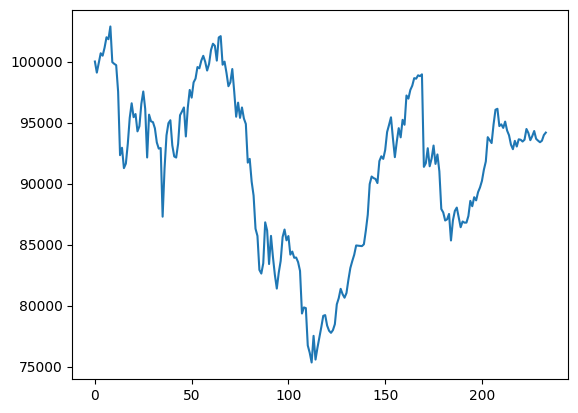

In [51]:
import matplotlib.pyplot as plt
plt.plot(equity_curve)
plt.show()

In [139]:
cagr=(pow((equity_curve[-1]/equity_curve[0]),(1/(len(equity_curve)-1)))-1)*100
print("cagr: "+str(cagr))
net_gain=equity_curve[-1]-portfolio_value
print("net_gain: "+str(net_gain))

cagr: -0.031121213107154766
net_gain: -6995.630703404779


In [96]:
def max_drawdown(window):
    Roll_Max=df['Close'].rolling(window,min_periods=1).max()
    Daily_Drawdown=df['Close']/Roll_Max-1.0
    Max_Daily_Drawdown=Daily_Drawdown.rolling(window,min_periods=1).min()
    Max_Daily_Drawdown.plot()

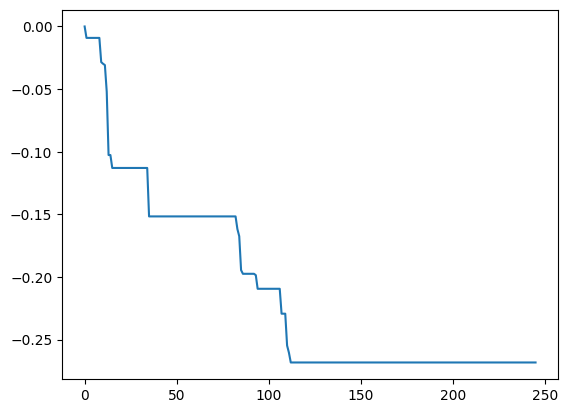

In [97]:
df = pd.DataFrame({'Close':equity_curve})
max_drawdown(len(equity_curve))